this is a part of bigger pipeline for the project (------------ADD LINK -------------)


##### --- for the Blog ----
## Project outline of CNN for tree identification

- tree species in Berlin - Analysis by Hany (Step 0)
a) berlin databank of trees:
berlin_trees = ['ACER', 'AESCULUS','BETULA', 'CARPINUS', 'CORYLUS','CRATAEGUS','FRAXINUS','PLATANUS','POPULUS', 'PRUNUS','QUERCUS','ROBINIA','SORBUS','TILIA', 'ULMUS']
b) Adding genus/family present in Austrian leave set
'FAGUS'


- Identification of suitable image dataset (Step 1) (### done)
(we face difficaties using imagenet (Explain why -----)
We decided we will focus on the tree species in Berlin and create an image dataset downloaded via bing with a focus on leaves. We decided we will measure our success by using the Austrian leaves dataset.
### deployment of model used in browser (Step 2)
- this is done , in the mid-term  (explain more ---------)

--> output file/google colab with text, code, results and conclusion
Inital Setup of softwarepipeline, deployment of model used in browser (Step 2)
--> Integration into Web application on Trees website
#### improving the model & Active learning (step 3, step 4)

-  Downloading Images from Bing and manually sorting (Step3)

(---------- rewrite-----------)

Active learn via python library (Step 4)  - via superintend
1) species in Berlin --> image download via bing focused on LEAVES OF SPECIES
(maybe future:) 2) large(very old and high circumference) tree vs small tree (young, saplings etc), no tree --> image download via bing
How to measure successful improvement of model? - Austrian leaves dataset
Decision and implentation of the “best model (Step 5)
All of this originates from the idea to combine species and age of tree to estimate CO2 absorption.
And DL/AI learning: implementing transfer learning and active learning



(---------- rewrite ----------)
Next steps:
download bing images of tree species in Berlin (Step 3)
manual labeling
Active learning voila/python notebook (deployment? database?) (Step 4)
CNN model (Step 5)
How to measure sucess? Austrian leaves dataset?
Own CNN
Transfer learning (pre trained eg on imagenet)
mobile net etc
I naturalist

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics

import time

### Trees in Berlin 
- based on a quick excel file we found 63 Genus, with futher reserch we decided to only include the most common one ( > 4000 trees)

In [8]:
df = pd.read_excel('https://github.com/TechLabs-Berlin/st22-active-learn-trees/blob/DL-Neural-Network-updates/DL-neural-network/Step0%20-%20quick%20berlin%20tree%20analysis/AI%20tree%20in%20berlin.xlsx?raw=true')

df = df.dropna()
df

,Tree type,Tot_number
0,Abies,177.0
2,ACER,88399.0
4,AESCULUS,20605.0
6,AILANTHUS,934.0
8,ALNUS,1048.0
...,...,...
116,TILIA,152227.0
118,TOONA,3.0
120,TSUGA,3.0
122,ULMUS,6921.0


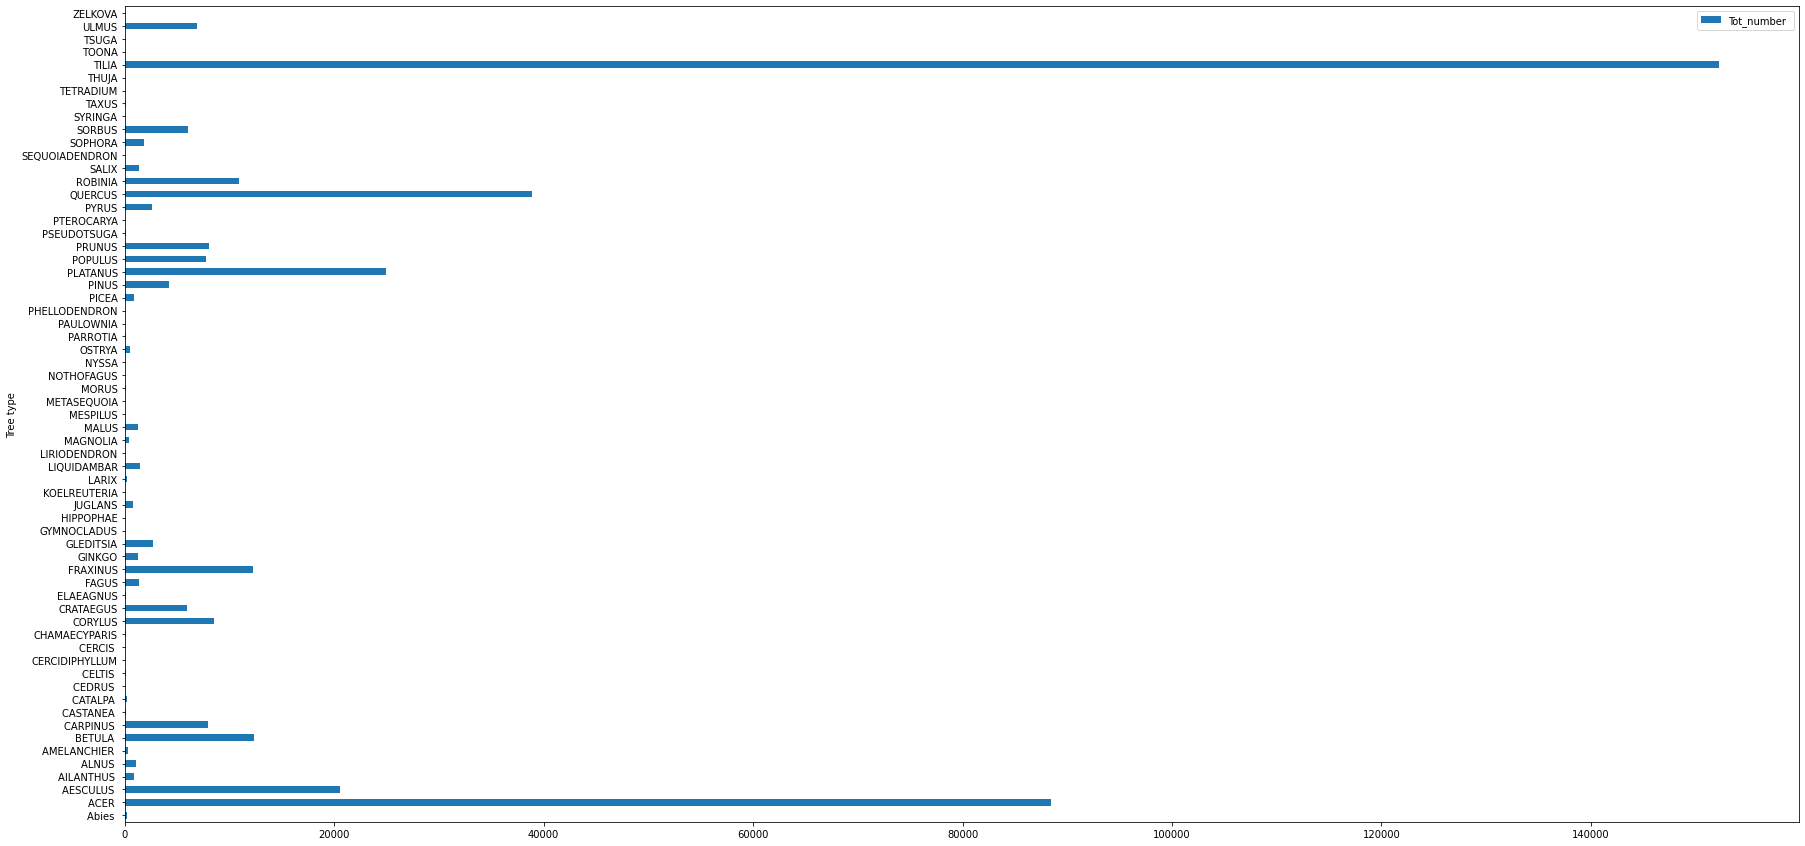

In [9]:
#df.columns

plt.rcParams["figure.figsize"] = (30, 15)
df.plot.barh(x='Tree type', y='Tot_number ',rot=0)


In [10]:
df_commen= df.loc[df["Tot_number "] >= 4000].reset_index(drop=True).sort_values(by=['Tot_number '])
df_commen

,Tree type,Tot_number
7,PINUS,4208.0
5,CRATAEGUS,5974.0
13,SORBUS,6019.0
15,ULMUS,6921.0
9,POPULUS,7768.0
3,CARPINUS,7961.0
10,PRUNUS,8027.0
4,CORYLUS,8485.0
12,ROBINIA,10896.0
6,FRAXINUS,12293.0


In [16]:
## define tree genus -- we added Fagus---

berlin_trees = ['ACER leaves', 'AESCULUS leaves','BETULA leaves', 'CARPINUS leaves', 'CORYLUS leaves','CRATAEGUS leaves','FRAXINUS leaves','PLATANUS leaves','POPULUS leaves', 'PRUNUS leaves','QUERCUS leaves','ROBINIA leaves','SORBUS leaves','TILIA leaves', 'ULMUS leaves', 'Fagus leaves']

## Download images from Bing image
 to ensure better results the search is based on 2 criteria :
 
  1- use Latin names of the trees.

  2- limiting the Dataset to just tree leaves, to easily judge the results as the model intends to use Austrian leaves dataset as an external test set.

In [17]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
from fastai.imports import *

#tree_types = 'acer leaves'
path = Path('trees-bing-Berlin-test12')

### Download images from Bing image

for o in berlin_trees:
  downloader.download(o, limit=50, output_dir=path, adult_filter_off=False, force_replace=False, timeout=5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[%] Downloading Images to /content/trees-bing-Berlin-test12/TILIA leaves


[!!]Indexing page: 1

[%] Indexed 17 Images on Page 1.


[%] Downloading Image #1 from http://www.euforgen.org/fileadmin/templates/euforgen.org/upload/speciesImages/Tilia_tomentosa/1.Tilia_tomentosa_youg_leaves.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.minnesotawildflowers.info/udata/r9ndp23q/pd3/tilia-americana-6432789-8.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.cals.ncsu.edu/plantbiology/ncsc/tnc/images/tilia_americana_heterophylla_Baskauf_lf.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.cals.ncsu.edu/plantbiology/ncsc/tnc/images/tiamhe50887.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Tilia_tomentosa.jpg/330px-Tilia_tomentosa.jpg
[%] File Downloaded !

[%] Downloading 

Saving the files 

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


tree categories (part of step 4)

In [ ]:
# berlin_Baum_typ= ['Ahorn Laub', 'Kastanie Laub','Birke Laub', 'Hainbuche Laub', 'Hasel Laub','Weißdorn Laub','Esche Laub','Platane Laub','Pappel Laub', 'Lorbeer Laub','Eiche Laub','Robine Laub','Eberesche Laub','Linde Laub', 'Ulme Laub', 'Rotbuche Laub']